In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
pokemon_df = pd.read_csv('./pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
pokemon_df= pokemon_df.set_index("#")
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
combats_df = pd.read_csv('./combats.csv')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [6]:
pokemon_df["Type 2"].value_counts(dropna =False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [7]:
pokemon_df["Type 2"].fillna('empty',inplace=True)
pokemon_df["Type 2"].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [8]:
print(combats_df.dtypes)
print('-' * 30)
print(pokemon_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [9]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category')
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category')
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int')
pokemon_df.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int32
dtype: object

In [10]:
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])
df_type1_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])
df_type2_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot, fill_value=0).astype('int64')
pd.options.display.max_columns = 30
pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [14]:
pokemon_df['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

In [15]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
pokemon_df.drop('Name', axis='columns', inplace=True)
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
combats_df['Winner'] = combats_df.apply(lambda x: 0 
                                        if x.Winner == x.First_pokemon else 1, 
                                        axis='columns')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [18]:
data_num = combats_df.shape[0]
indexes = np.random.permutation(data_num)
train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]
train_data = combats_df.loc[train_indexes]
val_data = combats_df.loc[val_indexes]
test_data = combats_df.loc[test_indexes]

In [19]:
pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19

In [20]:
mean = pokemon_df.loc[:, 'HP':'Generation'].mean()
std = pokemon_df.loc[:, 'HP':'Generation'].std()
pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation']-mean)/std
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
x_train_index = np.array(train_data.drop('Winner', axis='columns'))
x_val_index = np.array(val_data.drop('Winner', axis='columns'))
x_test_index = np.array(test_data.drop('Winner', axis='columns'))
print(x_train_index)

[[148 487]
 [204 304]
 [107 155]
 ...
 [545  93]
 [ 55 507]
 [686 659]]


In [22]:
y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])

In [23]:
pokemon_data_normal = np.array(pokemon_df.loc[:, :'Legendary'])
print(pokemon_data_normal.shape)
x_train_normal = pokemon_data_normal[x_train_index -1].reshape((-1, 20))
x_val_normal = pokemon_data_normal[x_val_index -1].reshape((-1, 20))
x_test_normal = pokemon_data_normal[x_test_index -1].reshape((-1, 20))
print(x_train_normal.shape)

(800, 10)
(30000, 20)


In [24]:
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP':])
print(pokemon_data_one_hot.shape)
x_train_one_hot = pokemon_data_one_hot[x_train_index -1].reshape((-1, 54))
x_val_one_hot = pokemon_data_one_hot[x_val_index -1].reshape((-1, 54))
x_test_one_hot = pokemon_data_one_hot[x_test_index -1].reshape((-1, 54))
print(x_train_one_hot.shape)

(800, 27)
(30000, 54)


In [26]:
inputs = keras.Input(shape=(20, ))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1344      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0   

In [27]:
model_1.compile(keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(),
               metrics=[keras.metrics.BinaryAccuracy()])

In [28]:
model_dir = 'lab3-logs/models'
os.makedirs(model_dir)

In [29]:
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                             monitor='val_binary_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

In [30]:
history_1 = model_1.fit(x_train_normal, y_train, 
                batch_size=64 ,
                epochs=200, 
                validation_data=(x_val_normal, y_val),
                callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 [==============================] - 5s 6ms/step - loss: 0.4386 - binary_accuracy: 0.8186 - val_loss: 0.3114 - val_binary_accuracy: 0.9044
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.3296 - binary_accuracy: 0.8925 - val_loss: 0.2325 - val_binary_accuracy: 0.9253
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2791 - binary_accuracy: 0.9078 - val_loss: 0.2140 - val_binary_accuracy: 0.9291
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2524 - binary_accuracy: 0.9170 - val_loss: 0.2034 - val_binary_accuracy: 0.9275
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2365 - binary_accuracy: 0.9224 - val_loss: 0.1898 - val_binary_accuracy: 0.9322
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2231 - binary_accuracy: 0.9265 - val_loss: 0.1832 - val_binary_accuracy: 0.9347
Epoch 7/200
469/469 [==============================] - 2s 

Epoch 53/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1701 - binary_accuracy: 0.9456 - val_loss: 0.1651 - val_binary_accuracy: 0.9467
Epoch 54/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1718 - binary_accuracy: 0.9444 - val_loss: 0.1672 - val_binary_accuracy: 0.9455
Epoch 55/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1719 - binary_accuracy: 0.9443 - val_loss: 0.1670 - val_binary_accuracy: 0.9460
Epoch 56/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1695 - binary_accuracy: 0.9450 - val_loss: 0.1632 - val_binary_accuracy: 0.9480
Epoch 57/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1692 - binary_accuracy: 0.9459 - val_loss: 0.1634 - val_binary_accuracy: 0.9480
Epoch 58/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1696 - binary_accuracy: 0.9452 - val_loss: 0.1672 - val_binary_accuracy: 0.9467
Epoch 59/200
469/469 [==============================

Epoch 105/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1617 - binary_accuracy: 0.9476 - val_loss: 0.1632 - val_binary_accuracy: 0.9478
Epoch 106/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1612 - binary_accuracy: 0.9483 - val_loss: 0.1621 - val_binary_accuracy: 0.9485
Epoch 107/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1630 - binary_accuracy: 0.9486 - val_loss: 0.1618 - val_binary_accuracy: 0.9487
Epoch 108/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1607 - binary_accuracy: 0.9484 - val_loss: 0.1680 - val_binary_accuracy: 0.9460
Epoch 109/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1593 - binary_accuracy: 0.9485 - val_loss: 0.1697 - val_binary_accuracy: 0.9468
Epoch 110/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1638 - binary_accuracy: 0.9482 - val_loss: 0.1594 - val_binary_accuracy: 0.9482
Epoch 111/200
469/469 [=======================

In [32]:
inputs = keras.Input(shape=(54, ))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = keras.Model(inputs, outputs, name='model-2')
model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                3520      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0   

In [33]:
model_2.compile(keras.optimizers.Adam(), 
               loss=keras.losses.BinaryCrossentropy(), 
               metrics=[keras.metrics.BinaryAccuracy()])

In [34]:
log_dir = os.path.join('lab3-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', 
                                         monitor='val_binary_accuracy', 
                                         save_best_only=True, 
                                         mode='max')

In [35]:
history_2 = model_2.fit(x_train_one_hot, y_train, 
                    batch_size=64 ,
                    epochs=200, 
                    validation_data=(x_val_one_hot, y_val), 
                    callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4360 - binary_accuracy: 0.8191 - val_loss: 0.3148 - val_binary_accuracy: 0.9023
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.3236 - binary_accuracy: 0.8915 - val_loss: 0.2390 - val_binary_accuracy: 0.9178
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2754 - binary_accuracy: 0.9062 - val_loss: 0.1979 - val_binary_accuracy: 0.9248
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2411 - binary_accuracy: 0.9162 - val_loss: 0.1848 - val_binary_accuracy: 0.9287
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2233 - binary_accuracy: 0.9219 - val_loss: 0.1754 - val_binary_accuracy: 0.9336
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2103 - binary_accuracy: 0.9248 - val_loss: 0.1653 - val_binary_accuracy: 0.9337
Epoch 7/200
469/469 [==============================] - 2s 

Epoch 53/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0972 - binary_accuracy: 0.9628 - val_loss: 0.1099 - val_binary_accuracy: 0.9614
Epoch 54/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0988 - binary_accuracy: 0.9617 - val_loss: 0.1027 - val_binary_accuracy: 0.9607
Epoch 55/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0948 - binary_accuracy: 0.9640 - val_loss: 0.1102 - val_binary_accuracy: 0.9590
Epoch 56/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0917 - binary_accuracy: 0.9642 - val_loss: 0.1061 - val_binary_accuracy: 0.9632
Epoch 57/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0954 - binary_accuracy: 0.9651 - val_loss: 0.1037 - val_binary_accuracy: 0.9604
Epoch 58/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0932 - binary_accuracy: 0.9649 - val_loss: 0.1005 - val_binary_accuracy: 0.9634
Epoch 59/200
469/469 [==============================

Epoch 105/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0814 - binary_accuracy: 0.9691 - val_loss: 0.0992 - val_binary_accuracy: 0.9647
Epoch 106/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0846 - binary_accuracy: 0.9678 - val_loss: 0.1050 - val_binary_accuracy: 0.9628
Epoch 107/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0819 - binary_accuracy: 0.9690 - val_loss: 0.1018 - val_binary_accuracy: 0.9647
Epoch 108/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0837 - binary_accuracy: 0.9668 - val_loss: 0.1024 - val_binary_accuracy: 0.9653
Epoch 109/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0821 - binary_accuracy: 0.9694 - val_loss: 0.1062 - val_binary_accuracy: 0.9641
Epoch 110/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0831 - binary_accuracy: 0.9689 - val_loss: 0.1008 - val_binary_accuracy: 0.9639
Epoch 111/200
469/469 [=======================

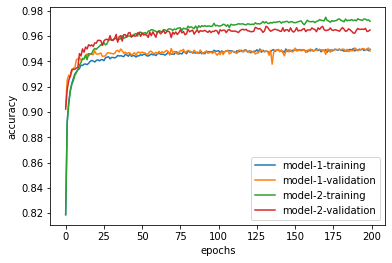

In [37]:
plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

In [38]:
model_1.load_weights(model_dir + '/Best-model-1.h5')
model_2.load_weights(model_dir + '/Best-model-2.h5')
loss_1, accuracy_1 = model_1.evaluate(x_test_normal, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test_one_hot, y_test)
print("Model-1: {}%\nModel-2: {}%".format(accuracy_1, accuracy_2))

313/313 [==============================] - 1s 2ms/step - loss: 0.1017 - binary_accuracy: 0.9647
Model-1: 0.9513999819755554%
Model-2: 0.9646999835968018%


In [39]:
venusaur = np.expand_dims(pokemon_data_one_hot[3], axis=0)
charizard = np.expand_dims(pokemon_data_one_hot[7], axis=0)
blastoise = np.expand_dims(pokemon_data_one_hot[12], axis=0)

In [41]:
# 妙蛙花 vs 噴火龍
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = '妙蛙花' if pred < 0 else '噴火龍'
print("pred={}, {} 獲勝".format(pred, winner))

# 噴火龍 vs 水箭龜
pred = model_2.predict(np.concatenate([charizard, blastoise], axis=-1))
winner = '噴火龍' if pred < 0 else '水箭龜'
print("pred={}, {} 獲勝".format(pred, winner))

# 水箭龜 vs 妙蛙花
pred = model_2.predict(np.concatenate([blastoise, venusaur], axis=-1))
winner = '水箭龜' if pred < 0 else '妙蛙花'
print("pred={}, {} 獲勝".format(pred, winner))

pred=[[0.99999845]], 噴火龍 獲勝
pred=[[3.842891e-09]], 水箭龜 獲勝
pred=[[1.]], 妙蛙花 獲勝
